In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

###Import the data.

In [8]:
df_K = pd.read_csv(filepath_or_buffer = 'reference_data/chamber_2b_data/cham_2b_all_python.csv', parse_dates = [0], index_col = 0)

####Enter the column number you'd like to evaluate.

In [12]:
#col = raw_input('Enter the column you would like to inspect: ')
col = 'o3_ppb'

####Define a function, called unique_column_values, that displays every unique value in the selected column.

In [10]:
def unique_column_values(df,column_name):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #look at every unique value in each column sto make sure they look reasonable
    #column_num is the number of the column that the user picks
    print column_name, df[column_name].unique()


####Call the unique_column_values function for column of the data that you want to evaluate. Look at the data and make sure there aren't any obvious outliers.


In [13]:
unique_column_values(df_K,col)

o3_ppb [  64.6   67.6   67.5 ...,  248.2  249.2  108.8]


####Define a function, column_plot, that gives you a plot of all of the data on one column. Look for outliers.

In [14]:
def column_plot(df, column_name, time_chunk):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    print column_names
    #xlim = ['2014-07-27 0:00:00', '2014-7-28 0:00:00' ]
    #xlim = assign_pod_calibration_times(pod_num, time_chunk)
    #look at every unique value in each column sto make sure they look reasonable
    #column_num is the number of the column that the user picks
    df[column_name].plot(marker = '.',figsize = (20,10), legend = True)
    #, xlim = xlim

####Call the function, column_plot, using the column of the data that you want to plot.

Index([u'o3_ppb'], dtype='object')


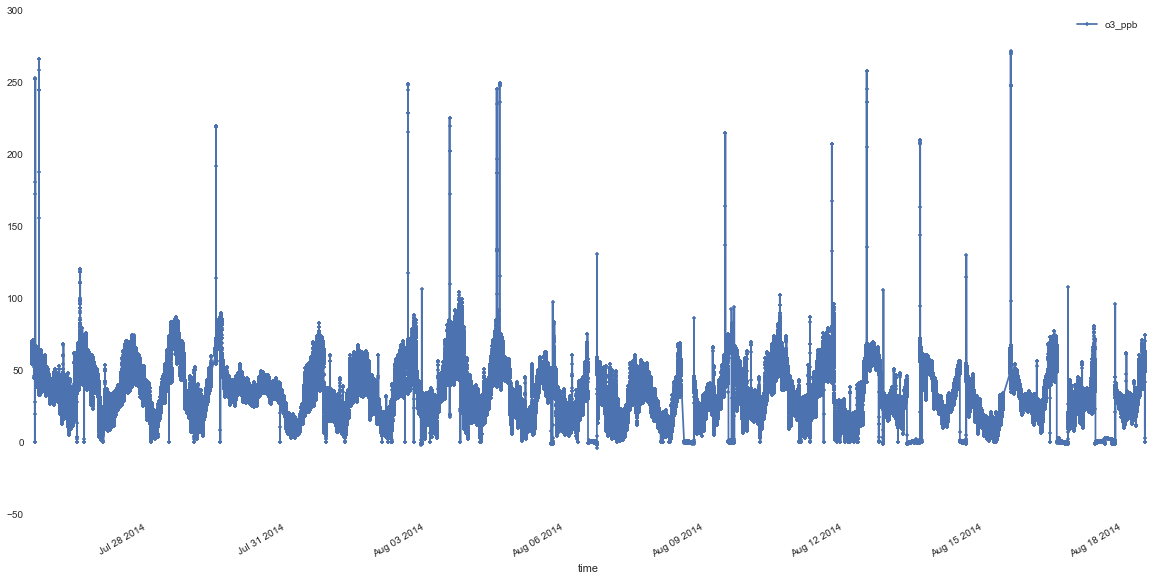

In [15]:
column_plot(df_K, col, 1)

#You can stop here and move on the the next column if you don't see any outliers!!!!

####Define a function, remove_data_above, that removes data above a specified value.

In [16]:
def remove_data_above(df,column_name,n):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #remove values below/above n from the matrix
    df = df[df[column_name] < n]
    #print unique values to make sure the bad ones got removed
    print column_name, df[column_name].unique()
    #return the dataframe, so that it can be used to change df_K
    return df

####Define a function, remove_data_below, that removes data below a specified value.

In [17]:
def remove_data_below(df,column_name,n):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #remove values below/above n from the matrix
    df = df[df[column_name] > n]
    #print unique values to make sure the bad ones got removed
    print column_name, df[column_name].unique()
    #return the dataframe, so that it can be used to change df_K
    return df

####Call the function, remove_data_above, to remove data above a certain value, by entering (df_K,col,value).

In [23]:
df_K = remove_data_above(df_K, col, 115)

o3_ppb [  64.6   67.6   67.5   66.7   66.    66.3   66.8   66.4   65.6   65.2
   63.8   63.9   64.5   65.3   68.5   69.4   69.5   65.    65.4   66.6
   66.5   66.9   67.3   69.2   69.1   67.8   67.7   67.4   69.9   68.8
   68.1   68.    65.7   64.8   63.5   64.4   66.1   64.1   64.3   63.1
   63.2   62.9   63.4   65.1   67.2   65.9   65.8   67.    64.7   65.5
   64.    62.8   61.1   61.    60.7   60.8   61.4   61.2   60.    59.7
   57.8   57.1   57.2   58.    58.4   62.6   67.9   68.2   69.    69.3
   62.4   62.7   63.7   68.3   68.4   68.6   68.9   69.6   69.7   70.
   69.8   64.9   63.6   67.1   64.2   66.2   70.4   63.3   61.9   61.7
   61.3   62.1   60.9   70.3   70.2   68.7   60.2   60.1   60.6   59.3
   58.9   58.2   57.9   58.5   59.5   59.1   56.1   55.8   55.6   62.2
   62.5   59.8   59.9   61.6   60.5   60.3   60.4   61.8   61.5   63.    62.
   70.1   70.9   70.7   71.7   71.6   70.8   59.2   59.4   57.3   57.7
   58.6   58.8   58.3   58.7   58.1   57.4   57.6   59.    56.4  

####Call the function, remove_data_below, to remove data below a certain value, by entering (df_K,col,value).

In [21]:
df_K = remove_data_below(df_K, col, 5)

o3_ppb [  64.6   67.6   67.5   66.7   66.    66.3   66.8   66.4   65.6   65.2
   63.8   63.9   64.5   65.3   68.5   69.4   69.5   65.    65.4   66.6
   66.5   66.9   67.3   69.2   69.1   67.8   67.7   67.4   69.9   68.8
   68.1   68.    65.7   64.8   63.5   64.4   66.1   64.1   64.3   63.1
   63.2   62.9   63.4   65.1   67.2   65.9   65.8   67.    64.7   65.5
   64.    62.8   61.1   61.    60.7   60.8   61.4   61.2   60.    59.7
   57.8   57.1   57.2   58.    58.4   62.6   67.9   68.2   69.    69.3
   62.4   62.7   63.7   68.3   68.4   68.6   68.9   69.6   69.7   70.
   69.8   64.9   63.6   67.1   64.2   66.2   70.4   63.3   61.9   61.7
   61.3   62.1   60.9   70.3   70.2   68.7   60.2   60.1   60.6   59.3
   58.9   58.2   57.9   58.5   59.5   59.1   56.1   55.8   55.6   62.2
   62.5   59.8   59.9   61.6   60.5   60.3   60.4   61.8   61.5   63.    62.
   70.1   70.9   70.7   71.7   71.6   70.8   59.2   59.4   57.3   57.7
   58.6   58.8   58.3   58.7   58.1   57.4   57.6   59.    56.4  

####Replot the data to see how well the cleaning worked.

Index([u'o3_ppb'], dtype='object')


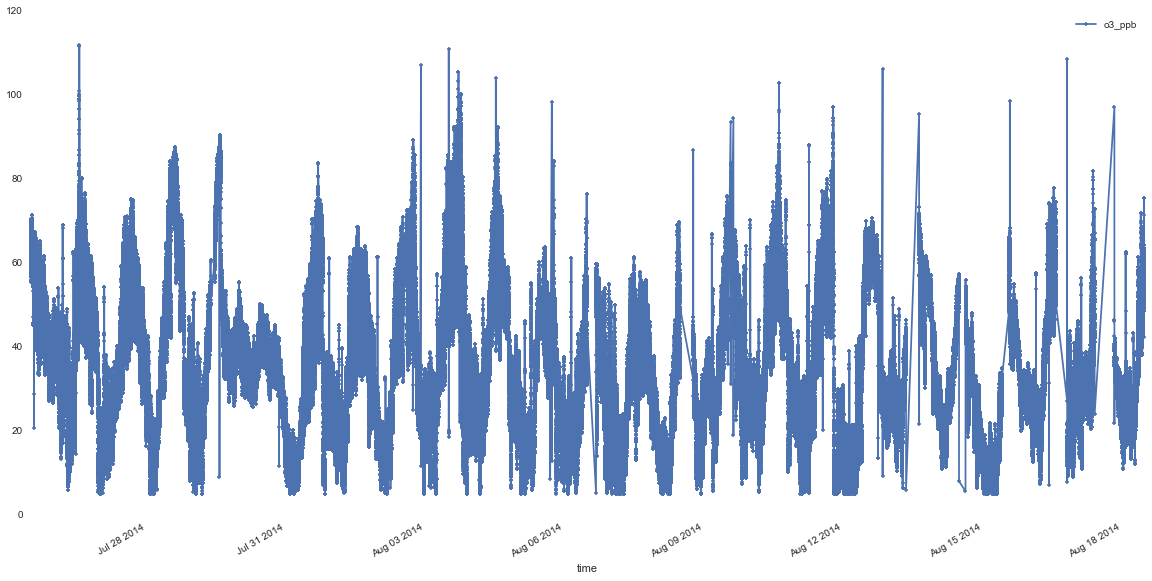

In [24]:
column_plot(df_K, col, 2)

#Go back and clean the data again if necessary.

###Otherwise, write the new dataframe to a file. Do this after cleaning each row, so that if you make a mistake with a row, you don't have to reclean all of the other rows.

In [28]:
df_K.to_csv(path_or_buf = 'pod_files/pod1_7_25.csv')